# E3.1 Testing


In [43]:
import numpy as np


In [44]:
banana_prototype = np.array([-1,1,-1]).reshape(3,1)
pineapple_prototype = np.array([-1,-1,1]).reshape(3,1)

In [45]:
def hardlims(n):
    return 1 if n >= 0 else -1
def poslin(n):
    return np.vectorize(lambda x: 0 if x < 0 else x)(n)
def satlins(n):
    return np.vectorize(lambda x: 1 if x > 1 else (-1 if x < -1 else x))(n)

In [46]:
def perceptron(p_t1):
    weights_perceptron = np.array([0,1,-1])
    bias_perceptron = 0
    # hardmis(Wp + b)
    n_perceptron = np.dot(weights_perceptron,p_t1) + bias_perceptron
    if hardlims(n_perceptron) == 1:
        print("Banana, Result: ", hardlims(n_perceptron))
    else:
        print("Pineapple, Result: ", hardlims(n_perceptron))

In [47]:
def hamming(p_t1):
    weighs_hamming_feedforward = np.array([banana_prototype.T, pineapple_prototype.T]).reshape(2,3)
    bias_hamming_feedforward = np.array([3,3]).reshape(2,1)
    # purelin(Wp + b)
    a_hamming_initial = np.dot(weighs_hamming_feedforward,p_t1) + bias_hamming_feedforward
    print("Hamming initial - a1: ", a_hamming_initial)
    epsilon = -0.5
    weights_hamming_recurrent = np.array([[1,epsilon],[epsilon,1]]).reshape(2,2)
    # poslin(Wp)
    a_hamming_recurrent_a2 = poslin(weights_hamming_recurrent.dot(a_hamming_initial))
    while True:
        a_hamming_recurrent_a3 = poslin(weights_hamming_recurrent.dot(a_hamming_recurrent_a2))
        if np.array_equal(a_hamming_recurrent_a2,a_hamming_recurrent_a3):
            break
        else:
            a_hamming_recurrent_a2 = a_hamming_recurrent_a3
    print("Hamming recurrent convergent result - a2: ", a_hamming_recurrent_a2)

In [48]:
def hopfield(p_t1):
    weights_hopfield = np.array([[0.2,0,0],[0,1.2,0],[0,0,1.2]]).reshape(3,3)
    bias_hopfield = np.array([-0.9,0,0]).reshape(3,1)
    a_hopfield_initial_a1 = satlins(weights_hopfield.dot(p_t1) + bias_hopfield)
    if np.array_equal(a_hopfield_initial_a1,p_t1):
        print("Hopfield convergent result - a2: ", a_hopfield_initial_a1)
    else:
        while True:
            a_hopfield_initial_a2 = satlins(weights_hopfield.dot(a_hopfield_initial_a1) + bias_hopfield)
            if np.array_equal(a_hopfield_initial_a1,a_hopfield_initial_a2):
                break
            else:
                a_hopfield_initial_a1 = a_hopfield_initial_a2
        print("Hopfield convergent result - a2: ", a_hopfield_initial_a2)

In [49]:
p_t1 = np.array([-1,1,-1]).reshape(3,1)
p_t2 = np.array([-1,-1,1]).reshape(3,1)

In [50]:
perceptron(p_t1)
hamming(p_t1)
hopfield(p_t1)

Banana, Result:  1
Hamming initial - a1:  [[6]
 [2]]
Hamming recurrent convergent result - a2:  [[5.]
 [0.]]
Hopfield convergent result - a2:  [[-1]
 [ 1]
 [-1]]


In [51]:
perceptron(p_t2)
hamming(p_t2)
hopfield(p_t2)

Pineapple, Result:  -1
Hamming initial - a1:  [[2]
 [6]]
Hamming recurrent convergent result - a2:  [[0]
 [5]]
Hopfield convergent result - a2:  [[-1]
 [-1]
 [ 1]]


In [52]:
p_t2 = np.array([-1,1,1]).reshape(3,1)

In [53]:
perceptron(p_t2)
hamming(p_t2)
hopfield(p_t2)

Banana, Result:  1
Hamming initial - a1:  [[4]
 [4]]
Hamming recurrent convergent result - a2:  [[0.e+000]
 [5.e-324]]
Hopfield convergent result - a2:  [[-1]
 [ 1]
 [ 1]]


In [54]:
p_t3 = np.array([-1,-1,1]).reshape(3,1)

In [55]:
perceptron(p_t3)
hamming(p_t3)
hopfield(p_t3)

Pineapple, Result:  -1
Hamming initial - a1:  [[2]
 [6]]
Hamming recurrent convergent result - a2:  [[0]
 [5]]
Hopfield convergent result - a2:  [[-1]
 [-1]
 [ 1]]


# E3.6 Testing

In [56]:
def hamming_e36(p_t1):
    weighs_hamming_feedforward = np.array([[1,1],[-1,1]]).reshape(2,2)
    bias_hamming_feedforward = np.array([2,2]).reshape(2,1)
    # purelin(Wp + b)
    a_hamming_initial = np.dot(weighs_hamming_feedforward,p_t1) + bias_hamming_feedforward
    print("Hamming initial - a1: ", a_hamming_initial)
    epsilon = -0.5
    weights_hamming_recurrent = np.array([[1,epsilon],[epsilon,1]]).reshape(2,2)
    # poslin(Wp)
    a_hamming_recurrent_a2 = poslin(weights_hamming_recurrent.dot(a_hamming_initial))
    while True:
        a_hamming_recurrent_a3 = poslin(weights_hamming_recurrent.dot(a_hamming_recurrent_a2))
        if np.array_equal(a_hamming_recurrent_a2,a_hamming_recurrent_a3):
            break
        else:
            a_hamming_recurrent_a2 = a_hamming_recurrent_a3
    print("Hamming recurrent convergent result - a2: ", a_hamming_recurrent_a2)

In [57]:
p_t_e36 = np.array([0.5,-0.5]).reshape(2,1)
hamming_e36(p_t_e36)

Hamming initial - a1:  [[2.]
 [1.]]
Hamming recurrent convergent result - a2:  [[1.5]
 [0. ]]


In [58]:
def hopfield_e36(p_t1):
    weights_hopfield = np.array([[0.2,0],[0,1.2]]).reshape(2,2)
    bias_hopfield = np.array([0.9,0]).reshape(2,1)
    a_hopfield_initial_a1 = satlins(weights_hopfield.dot(p_t1) + bias_hopfield)
    if np.array_equal(a_hopfield_initial_a1,p_t1):
        print("Hopfield convergent result - a2: ", a_hopfield_initial_a1)
    else:
        while True:
            a_hopfield_initial_a2 = satlins(weights_hopfield.dot(a_hopfield_initial_a1) + bias_hopfield)
            if np.array_equal(a_hopfield_initial_a1,a_hopfield_initial_a2):
                break
            else:
                a_hopfield_initial_a1 = a_hopfield_initial_a2
        print("Hopfield convergent result - a2: ", a_hopfield_initial_a2)

In [59]:
hopfield_e36(p_t_e36)

Hopfield convergent result - a2:  [[1]
 [0]]


In [60]:
def hamming_e37(p_t1):
    weighs_hamming_feedforward = np.array([[1,1],[-1,-1],[-1,1]]).reshape(3,2)
    bias_hamming_feedforward = np.array([2,2,2]).reshape(3,1)
    # purelin(Wp + b)
    a_hamming_initial = np.dot(weighs_hamming_feedforward,p_t1) + bias_hamming_feedforward
    print("Hamming initial - a1: ", a_hamming_initial)
    epsilon = -0.5
    a1_s = a_hamming_initial.shape[0]
    weights_hamming_recurrent = []
    for i in range(a1_s):
        weights_hamming_recurrent.append([epsilon]*a1_s)
    for i in range(a1_s):
        weights_hamming_recurrent[i][i] = 1
    weights_hamming_recurrent = np.array(weights_hamming_recurrent).reshape(a1_s,a1_s)
    # poslin(Wp)
    a_hamming_recurrent_a2 = poslin(weights_hamming_recurrent.dot(a_hamming_initial))
    while True:
        a_hamming_recurrent_a3 = poslin(weights_hamming_recurrent.dot(a_hamming_recurrent_a2))
        if np.array_equal(a_hamming_recurrent_a2,a_hamming_recurrent_a3):
            break
        else:
            a_hamming_recurrent_a2 = a_hamming_recurrent_a3
    print("Hamming recurrent convergent result - a2: ", a_hamming_recurrent_a2)
    return a_hamming_recurrent_a2

In [61]:
p_t_e37 = np.array([1,0]).reshape(2,1)

In [62]:
hamming_e37(p_t_e37)

Hamming initial - a1:  [[3]
 [1]
 [1]]
Hamming recurrent convergent result - a2:  [[2.]
 [0.]
 [0.]]


array([[2.],
       [0.],
       [0.]])

Hamming initial - a1:  [[0.]
 [4.]
 [2.]]
Hamming recurrent convergent result - a2:  [[0]
 [3]
 [0]]
Hamming initial - a1:  [[0.02020202]
 [3.97979798]
 [2.02020202]]
Hamming recurrent convergent result - a2:  [[0]
 [2]
 [0]]
Hamming initial - a1:  [[0.04040404]
 [3.95959596]
 [2.04040404]]
Hamming recurrent convergent result - a2:  [[0]
 [2]
 [0]]
Hamming initial - a1:  [[0.06060606]
 [3.93939394]
 [2.06060606]]
Hamming recurrent convergent result - a2:  [[0]
 [2]
 [0]]
Hamming initial - a1:  [[0.08080808]
 [3.91919192]
 [2.08080808]]
Hamming recurrent convergent result - a2:  [[0]
 [2]
 [0]]
Hamming initial - a1:  [[0.1010101]
 [3.8989899]
 [2.1010101]]
Hamming recurrent convergent result - a2:  [[0]
 [2]
 [0]]
Hamming initial - a1:  [[0.12121212]
 [3.87878788]
 [2.12121212]]
Hamming recurrent convergent result - a2:  [[0]
 [2]
 [0]]
Hamming initial - a1:  [[0.14141414]
 [3.85858586]
 [2.14141414]]
Hamming recurrent convergent result - a2:  [[0]
 [2]
 [0]]
Hamming initial - a1:  [[0.

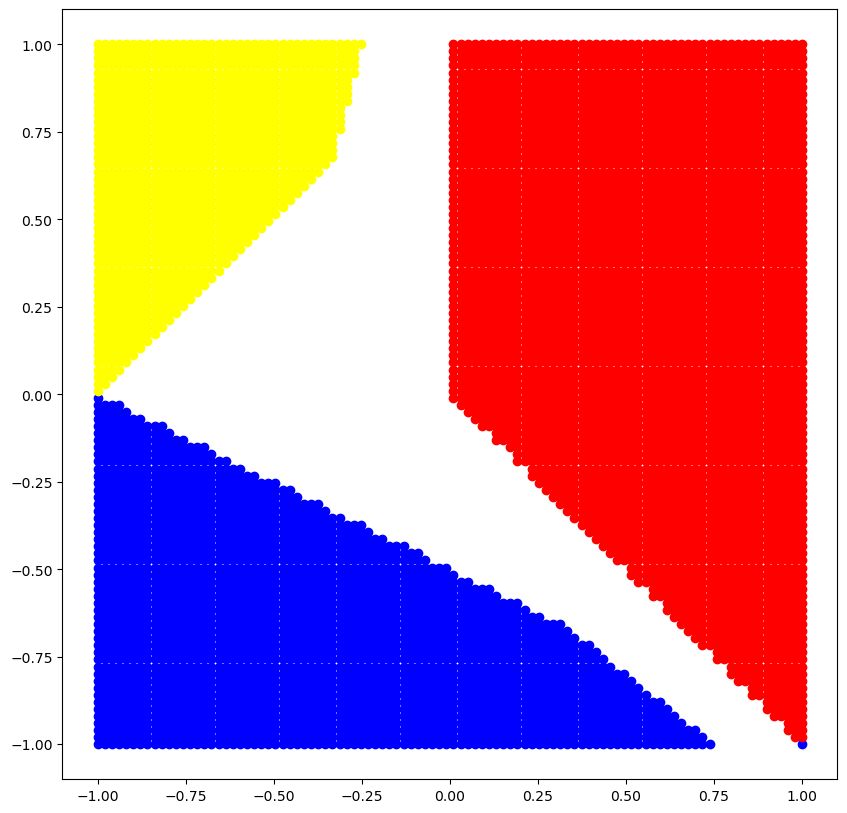

In [63]:
import matplotlib.pyplot as plt
x_e37 = np.linspace(-1,1,100)
y_e37 = np.linspace(-1,1,100)
color = ['red','blue', 'yellow']
plt.figure(figsize=(10,10))
for i in range(100):
    for j in range(100):
        p_t_e37 = np.array([x_e37[i],y_e37[j]]).reshape(2,1)
        test_result = hamming_e37(p_t_e37)
        for k in range(len(test_result)):
            if test_result[k] != 0 and sum(test_result) == test_result[k]:
                # plot the point
                plt.scatter(x_e37[i],y_e37[j],color=color[k])
plt.show()
        